In [46]:
import pandas as pd
import mlflow

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split



In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
import numpy as np
import pickle
import sklearn


2022/04/21 12:44:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2022/04/21 12:44:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.
2022/04/21 12:44:37 INFO mlflow.pyspark.ml: No SparkSession detected. Autologging will log pyspark.ml models contained in the default allowlist. To specify a custom allowlist, initialize a SparkSession prior to calling mlflow.pyspark.ml.autolog() and specify the path to your allowlist file via the spark.mlflow.pysparkml.autolog.logModelAllowlistFile conf.
2022/04/21 12:44:37 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.ml.
2022/04/21 12:44:38 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/juliehinge/opt/anaconda3/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing v

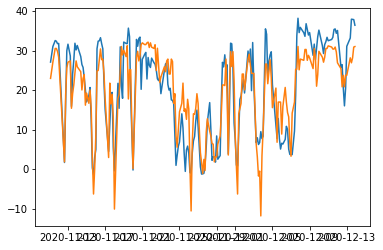

2022/04/21 12:44:41 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/juliehinge/opt/anaconda3/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


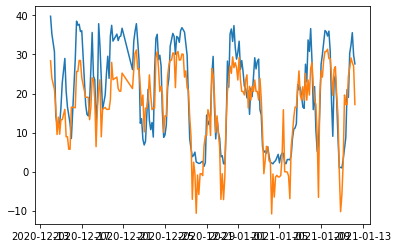

2022/04/21 12:44:44 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/juliehinge/opt/anaconda3/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


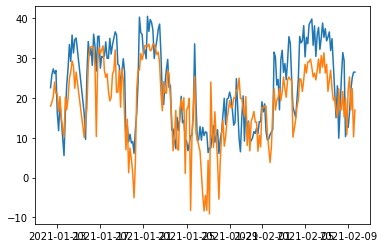

2022/04/21 12:44:47 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/juliehinge/opt/anaconda3/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


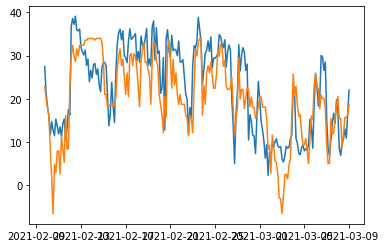

2022/04/21 12:44:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/juliehinge/opt/anaconda3/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


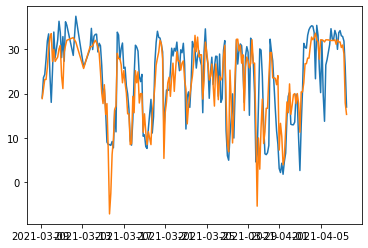

2022/04/21 12:44:53 WARNING mlflow.utils: Truncated the value of the key `estimator`. Truncated value: `Pipeline(steps=[('one_hot', OneHot()),
                ('col_trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('poly', PolynomialFeatures(),
                                      ...`


Fitting 27 folds for each of 10 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 224 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 263 out of 270 | elapsed:    9.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    9.2s finished
2022/04/21 12:45:02 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/juliehinge/opt/anaconda3/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as d

In [65]:
mlflow.autolog()
with mlflow.start_run(run_name="<descriptive name>"):
    # TODO: Insert path to dataset
    df = pd.read_json("dataset.json", orient="split")
    df = df.dropna()

    # TODO: Handle missing data

    
    winds = ['N', 'S', 'E', 'W', 'NE','NNE', 'SE', 'SSE', 'SW', 'SSW', 'ESE', 'ENE', 'WSW','WNW', 'NSW','NW', 'NNW' ]
    df['Direction'] = df['Direction'].apply(lambda x: winds.index(x))

    
    col_transformer = ColumnTransformer([('poly', PolynomialFeatures(), ['Speed'])], remainder = 'passthrough')

    X = df[["Speed","Direction"]]
    Y = df["Total"]
    X_train, X_test, Y_train, Y_test = train_test_split(X,Y, shuffle = False, test_size = 0.2, random_state = 42)

    class OneHot(BaseEstimator, TransformerMixin):
        def __init__(self):
            return None

        def one_hot(self, X):
            winds = ['N', 'S', 'E', 'W', 'NE','NNE', 'SE', 'SSE', 'SW', 'SSW', 'ESE', 'ENE', 'WSW','WNW', 'NSW','NW', 'NNW' ]
            for direction in winds:
                _ = []
                for ix, row in X.iterrows():
                    if row.loc['Direction'] == winds:
                        _.append(1)
                    else:
                        _.append(0)

                    X.loc[:,direction] = _

                    X = self.X.drop('Direction', axis=1)
            return X.values

        def fit(self, X, y = None):
            return self

        def transform(self, X, y = None):
            X_cp = X.copy()
         #   X_cp = X_cp.drop(["Source_time", "Lead_hours"], axis = 1)
            return X_cp
    
        
    pipeline = Pipeline(steps=[
        ('one_hot', OneHot()), 
        ('col_trans', col_transformer),
        ('scaling', StandardScaler()),
        ('linear_model', LinearRegression())
    ])

    
    #pipeline = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])
   


    # TODO: Currently the only metric is MAE. You should add more. What other metrics could you use? Why?
    metrics = [
        ("MAE", mean_absolute_error, []), ("r2", r2_score, [])
         ]


    number_of_splits = 5

    #TODO: Log your parameters. What parameters are important to log?
    #HINT: You can get access to the transformers in your pipeline using `pipeline.steps`
    
    for train, test in TimeSeriesSplit(number_of_splits).split(X,y):
        pipeline.fit(X.iloc[train],y.iloc[train])
        predictions = pipeline.predict(X.iloc[test])
        truth = y.iloc[test]

        from matplotlib import pyplot as plt 
        plt.plot(truth.index, truth.values, label="Truth")
        plt.plot(truth.index, predictions, label="Predictions")
        plt.show()
        
        # Calculate and save the metrics for this fold
        for name, func, scores in metrics:
            score = func(truth, predictions)
            scores.append(score)
   

    param_grid = {
    "col_trans__poly__degree" : [1,2,3,4,5],
    "col_trans__poly__interaction_only" :[True, False]
    }

    
    #with mlflow.start_run():
     #   mlflow.log_params(param_grid)
    
    grid = GridSearchCV(pipeline, param_grid = param_grid, scoring='neg_mean_squared_error',
                cv=TimeSeriesSplit(n_splits=int(X.shape[0]/((24*6)/3))).split(X_train,
        Y_train), verbose=4, n_jobs=-1, refit=True, return_train_score=True)

    grid.fit(X_train, Y_train)

    

    for name, _, scores in metrics:
            # NOTE: Here we just log the mean of the scores. 
            # Are there other summarizations that could be interesting?
        mean_score = sum(scores)/number_of_splits
        mlflow.log_metric(f"mean_{name}", mean_score)


  